# Milestone 4

## Evaluate the Trained Model on the Test Set



Objective

Using the feature extraction from the previous milestone, compute features for all videos in the test set and save them in HDF5 files. Make sure the features for genuine and Deepfake videos are saved in a separate folders, so you can know if the feature comes from original genuine video or Deepfake.

Using the pre-trained linear SVM model, apply it to the features in the test set.

Workflow

Similar to the preparation done for training, create features and labels for test set of videos.

The SVM model will return a vector of predicted labels for each feature in the test set.
Once you have one prediction label for one feature vector, you need to compute a prediction score for the whole video. 

The easiest way to do that is to take a mean of all predicted labels from the features of one same video. 

Then, you need to decide whether a non-binary predicted score is closer to 1 (genuine label) or 0 (Deepfake label). The easiest way is to use threshold 0.5; if the predicted score is above 0.5, we think the classifier labeled it as genuine and if it is below 0.5, we think it is a Deepfake.
Using the predicted scores you can compute error rates, such as false positive and false negative rates and accuracy. Note that you cannot compute error rate on the videos from training set because SVM model was trained on those videos and therefore will be very accurate at predicting them. You can only use test set to evaluate the classification performance. You can use this approach to computing the error rates. In practice, there are other ways to determine the threshold, such as equal error rate threshold.

### Load saved model and datasets

In [3]:
import pickle

In [2]:
model_filename = 'svm_linear.pkl'

In [4]:
with open(model_filename, "rb") as f:
   model = pickle.load(f)

In [5]:
X_test_filename = 'X_test_scaled.pkl'

with open(X_test_filename, "rb") as f:
    X_test_scaled = pickle.load(f)


In [ ]:
y_test_filename = 'y_test.pkl'

with open(y_test_filename, "rb") as f:
    y_test = pickle.load(f)

### Get predictions

In [6]:
y_pred = model.predict(X_test_scaled)

In [7]:
y_pred.shape

(8100,)

In [8]:
import numpy as np

In [9]:
# Average predictions per video

avg_scores = np.zeros(150)
pred_labels = np.zeros(150)

for i in range(150):
  # get all frames of a video
  video = y_pred[i*54:i*54+54]
  
  # compute average prediction score for a video
  avg_scores[i] = sum(video)/54
    
  # labels
  if avg_scores[i] > 0.5:
    pred_labels[i]= 1
  else:
    pred_labels[i] = 0


In [10]:
avg_scores

array([1.        , 1.        , 1.        , 0.62962963, 1.        ,
       1.        , 0.62962963, 0.7962963 , 0.09259259, 0.75925926,
       0.88888889, 0.88888889, 0.75925926, 0.88888889, 0.31481481,
       0.68518519, 0.2037037 , 0.07407407, 0.09259259, 0.03703704,
       0.        , 0.2037037 , 1.        , 0.96296296, 0.14814815,
       0.77777778, 1.        , 1.        , 1.        , 0.98148148,
       1.        , 1.        , 1.        , 0.88888889, 1.        ,
       0.94444444, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.96296296, 0.94444444, 0.44444444,
       0.66666667, 0.87037037, 0.92592593, 0.98148148, 1.        ,
       0.96296296, 1.        , 0.94444444, 0.96296296, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.98148148, 1.        , 1.        , 1.        , 1.     

In [11]:
pred_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
# Get true labels of all videos
test_labels = y_test[0::54]
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Analyze the Results


Objective

To analyze the performance of your system, you can **plot the predicted scores for test** set in several different ways. First, you can plot them as **two histograms (genuine and Deepfake scores)**. 

You can see the distribution of the histograms and conclude if the scores are well separated or not. **In a good system, the scores will be clearly separated. **
Then, you can **plot ROC curve with scikit-learn** and analyze the system’s performance for each different combination of false positive and true positive rates.
Workflow

By looping through the stored HDF5 files (use the same Glob library) of the test set, create the array of features for this set.

Apply trained SVM model on the features from the test set to get the predicted labels for all the features.

**For each video in the test set, find predicted labels for the video and compute the mean predicted score for this video.**

Knowing which videos in the test set are Deepfakes and which are genuine, **create two sets of scores**. 
One set should contain **predicted scores for Deepfake videos** (the number of scores should be the same as the number of Deepfake videos in the test set), and the other set should contain **scores for genuine/original videos**.

Using these two sets of scores **plot ROC curve and compute the Area Under the Curve (AUC).** AUC is one of the single performance measures that you can use to evaluate the performance of a classification system. You can check this example for tips.

Also compute **False Positive Rate (FPR), True Positive Rate (TPR), False Negative Rate (FNR), and Equal Error Rate (EER) threshold**. 

Using EER threshold, **compute equal error rate value**, which would be a single performance measure of your system. You can check this discussion for tips.

Change different parameters of your overall system and see how these changes affect your EER value, ROC curve, and AUC value. The parameters can include: the size of the cropped face, the kernel size and sigma of the Gaussian blur that you used to create a blurred copy of the image when computing features, and the parameters of SVM classifier such as kernel, gamma, etc.

### Create Confusion matrix and calculate confusion metrics

In [ ]:
from sklearn import metrics
import pandas as pd

In [18]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(test_labels, pred_labels)

# Assigning columns names
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])

cm_df

,Predicted Negative,Predicted Positive
Actual Negative,55,9
Actual Positive,10,76


In [19]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [20]:
confusion_metrics(cm)

True Positives: 76
True Negatives: 55
False Positives: 9
False Negatives: 10
--------------------------------------------------
Accuracy: 0.87
Mis-Classification: 0.13
Sensitivity: 0.88
Specificity: 0.86
Precision: 0.86
f_1 Score: 0.87


### Plot ROC curve and calculate AUC

In [23]:
import matplotlib.pyplot as plt

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, avg_scores, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

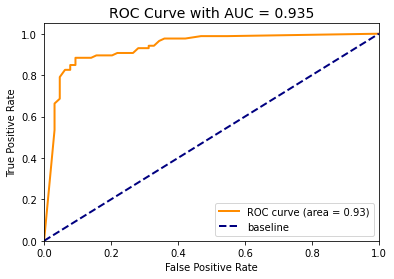

In [24]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='baseline')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"ROC Curve with AUC = {round(roc_auc,3)}", fontsize=14)
plt.legend(loc="lower right")

plt.show()

### Calculate EER

In [26]:
from scipy.optimize import brentq
from scipy.interpolate import interp1d

eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

In [30]:
print("EER:",  np.round(eer, 4))
print("Threshold:",  np.round(thresh, 4))

EER: 0.1163
Threshold: 0.5851
